# 1.Dataset/DataLoader class

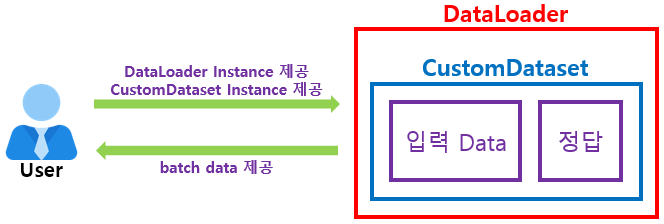

## 1.1.CustomDataset 정의

In [ ]:
from torch.utils.data import Dataset, DataLoader

# Dataset class를 상속받는 CustomDataset class 정의
# Dataset class를 상속받았기 때문에
# __init__(), __getitem__(), __len__() 를 재정의(Overriding)해야 함
class CustomDataset(Dataset):

  def __init__(self, x_train, y_train):
    # 입력 data(input feature)와 정답(label)을 저장
    self.x_train = x_train
    self.y_train = y_train

  def __getitem__(self, index):
    # index에 해당하는 요소(입력 data, 정답)를 반환
    return self.x_train[index], self.y_train[index]

  def __len__(self):
    # 입력 data의 크기(size)를 반환
    return self.x_train.shape[0]

## 1.2.instance 생성

In [ ]:
import torch

x_train = torch.Tensor([1, 2, 3, 4, 5, 6]).view(6, 1)
y_train = torch.Tensor([3, 4, 5, 6, 7, 8]).view(6, 1)

print(x_train)
print(y_train)

# CustomDataset의 instance 생성
dataset = CustomDataset(x_train, y_train)
# CustomDataset을 내부 변수로 가지는 DataLoader의 instance 생성
train_loader = DataLoader(dataset=dataset, batch_size=3, shuffle=True)

print(f'len(x_train) = {len(x_train)}') # len(x_train) = 6
print(f'len(train_loader) = {len(train_loader)}') # len(train_loader) = 2 (6 / 3)

tensor([[1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]])
tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.]])
len(x_train) = 6
len(train_loader) = 2


## 1.3.사용 예

In [ ]:
import torch.nn as nn

class SampleLinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_stack = nn.Sequential(
        nn.Linear(1, 1)
    )

  def forward(self, x):
    return self.linear_stack(x)

In [ ]:
import torch.optim as optim

model = SampleLinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

epochs = 2
for epoch in range(epochs):
  # 전체 data는 6개, batch_sixe=3 이므로 6 / 3 = 2번 반복
  # epoch 한 번당 2번 반복한다는 의미
  for idx, batch_data in enumerate(train_loader):
    # 3개씩의 입력/정답 data
    x_train_batch, y_train_batch = batch_data
    # 3개의 계산값을 return
    output_batch = model(x_train_batch)

    print(f'len(train_loader) = {len(train_loader)}') # len(train_loader) = 2
    print("==========================================================")
    print(f'epoch = {epoch}, batch_idx = {idx}')
    # x_train_batch: len = 3
    print(f'x_train_batch: len = {len(x_train_batch)}\n{x_train_batch}')
    # y_train_batch: len = 3
    print(f'y_train_batch: len = {len(y_train_batch)}\n{y_train_batch}')
    # output_batch: len = 3
    print(f'output_batch: len = {len(output_batch)}\n{output_batch}')

    loss = criterion(output_batch, y_train_batch)
    print(f'loss = {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

len(train_loader) = 2
epoch = 0, batch_idx = 0
x_train_batch: len = 3
tensor([[1.],
        [3.],
        [5.]])
y_train_batch: len = 3
tensor([[3.],
        [5.],
        [7.]])
output_batch: len = 3
tensor([[0.3994],
        [1.8577],
        [3.3160]], grad_fn=<AddmmBackward0>)
loss = 10.069598197937012
len(train_loader) = 2
epoch = 0, batch_idx = 1
x_train_batch: len = 3
tensor([[4.],
        [6.],
        [2.]])
y_train_batch: len = 3
tensor([[6.],
        [8.],
        [4.]])
output_batch: len = 3
tensor([[2.5956],
        [4.0580],
        [1.1332]], grad_fn=<AddmmBackward0>)
loss = 11.782561302185059
len(train_loader) = 2
epoch = 1, batch_idx = 0
x_train_batch: len = 3
tensor([[4.],
        [1.],
        [5.]])
y_train_batch: len = 3
tensor([[6.],
        [3.],
        [7.]])
output_batch: len = 3
tensor([[2.6078],
        [0.4056],
        [3.3418]], grad_fn=<AddmmBackward0>)
loss = 10.540165901184082
len(train_loader) = 2
epoch = 1, batch_idx = 1
x_train_batch: len = 3
tensor